<a href="https://colab.research.google.com/github/BhardwajArjit/Google-Colab/blob/main/Computer_Vision_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Computer vision libraries in PyTorch

Before we get started writing code, let's talk about some PyTorch computer vision libraries you should be aware of.

| PyTorch module | What does it do? |
| ----- | ----- |
| [`torchvision`](https://pytorch.org/vision/stable/index.html) | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains [a series of base classes for making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets). |
| [`torchvision.models`](https://pytorch.org/vision/stable/models.html) | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html) | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) | Base dataset class for PyTorch.  |
| [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#module-torch.utils.data) | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |

> **Note:** The `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

Now we've covered some of the most important PyTorch computer vision libraries, let's import the relevant dependencies.


In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Import tqdm for progress bar
from tqdm.auto import tqdm

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.0+cu118
torchvision version: 0.16.0+cu118


In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [ ]:
# GPU provided by Google Colab
!nvidia-smi

Fri Dec  8 12:33:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1. Getting a dataset

To begin working on a computer vision problem, let's get a computer vision dataset.

We're going to start with MNIST.

MNIST stands for Modified National Institute of Standards and Technology.

The MNIST dataset contains thousands of examples of handwritten digits (from 0 to 9) and was used to build computer vision models to identify numbers for postal services.

PyTorch has a bunch of common computer vision datasets stored in `torchvision.datasets`.

Including MNIST in [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html).

To download it, we provide the following parameters:
* `root: str` - which folder do you want to download the data to?
* `train: Bool` - do you want the training or test split?
* `download: Bool` - should the data be downloaded?
* `transform: torchvision.transforms` - what transformations would you like to do on the data?
* `target_transform` - you can transform the targets (labels) if you like too.

Many other datasets in `torchvision` have these parameter options.

In [ ]:
# Setup training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None, # you can transform labels as well
    download=True # download data if it doesn't exist on disk
)

# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    transform=ToTensor(),
    target_transform=None,
    download=True
)

100%|██████████| 9912422/9912422 [00:00<00:00, 101947479.24it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 98404300.43it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30211745.01it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18974630.25it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Let's check out the first sample of the training data.

In [ ]:
# See first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

### 1.1 Input and output shapes of a computer vision model

We've got a big tensor of values (the image) leading to a single value for the target (the label).

Let's see the image shape.

In [ ]:
# What's the shape of the image?
image.shape

torch.Size([1, 28, 28])

# The shape of the image tensor is `[1, 28, 28]` or more specifically:

```
[color_channels=1, height=28, width=28]
```

Having `color_channels=1` means the image is grayscale.

If `color_channels=3`, the image comes in pixel values for red, green and blue (this is also known a the [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model)).

The order of our current tensor is often referred to as `CHW` (Color Channels, Height, Width).

There's debate on whether images should be represented as `CHW` (color channels first) or `HWC` (color channels last).

> **Note:** You'll also see `NCHW` and `NHWC` formats where `N` stands for *number of images*. For example if you have a `batch_size=32`, your tensor shape may be `[32, 1, 28, 28]`. We'll cover batch sizes later.

PyTorch generally accepts `NCHW` (channels first) as the default for many operators.

However, PyTorch also explains that `NHWC` (channels last) performs better and is [considered best practice](https://pytorch.org/blog/tensor-memory-format-matters/#pytorch-best-practice).

For now, since our dataset and models are relatively small, this won't make too much of a difference.

But keep it in mind for when you're working on larger image datasets and using convolutional neural networks (we'll see these later).

Let's check out more shapes of our data.

In [ ]:
# How many samples are there?
len(train_data), len(test_data)

(60000, 10000)

So we've got 60,000 training samples and 10,000 testing samples.

What classes are there?

We can find these via the `.classes` attribute.

In [ ]:
# See classes
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

Because we're working with 10 different classes, it means our problem is **multi-class classification**.



In [ ]:
# It associates each class (or label) in the dataset with a numerical index
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [ ]:
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 5)

### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


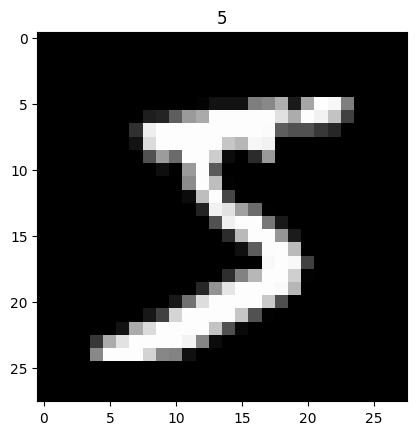

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray") # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

Let's view a few more.

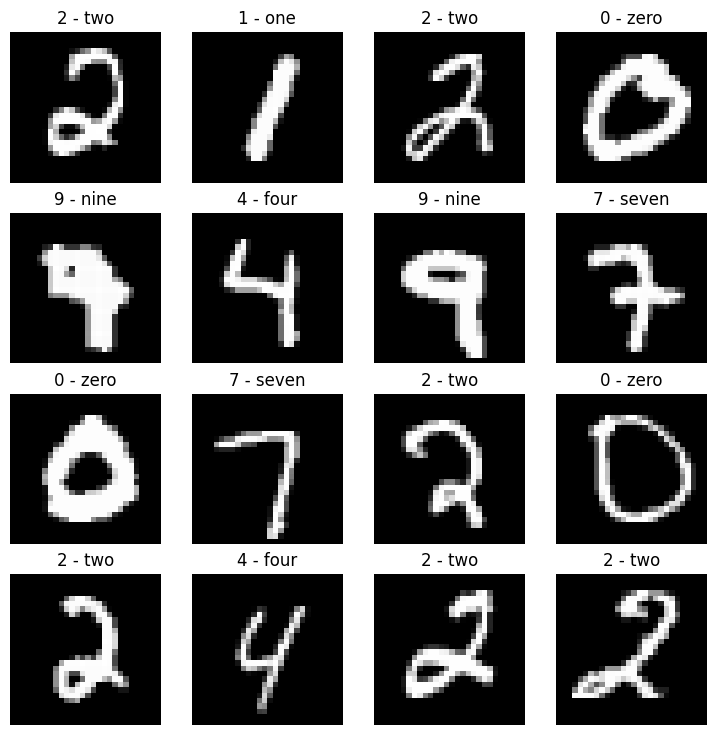

In [ ]:
# Creating a 4x4 grid for visualizing randomly selected training samples and their labels
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

# Iterating over the grid
for i in range(1, rows*cols+1):
  # Generating a random index to select a training sample
  random_idx = torch.randint(0, len(train_data), size=[1]).item()

  # Retrieving the image and label corresponding to the random index
  img, label = train_data[random_idx]

  # Adding subplots to the grid
  fig.add_subplot(rows, cols, i)

  # Displaying the current training sample as an image in grayscale
  plt.imshow(img.squeeze(), cmap="gray")

  # Setting the title with the class name based on the label
  plt.title(class_names[label])

  # Turning off axis for a cleaner visualization
  plt.axis(False)

## 2. Prepare DataLoader

Now we've got a dataset ready to go.

The next step is to prepare it with a [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) or `DataLoader` for short.

The `DataLoader` does what you think it might do.

It helps load data into a model.

For training and for inference.

It turns a large `Dataset` into a Python iterable of smaller chunks.

These smaller chunks are called **batches** or **mini-batches** and can be set by the `batch_size` parameter.

Why do this?

Because it's more computationally efficient.

In an ideal world you could do the forward pass and backward pass across all of your data at once.

But once you start using really large datasets, unless you've got infinite computing power, it's easier to break them up into batches.

It also gives your model more opportunities to improve.

With **mini-batches** (small portions of the data), gradient descent is performed more often per epoch (once per mini-batch rather than once per epoch).

What's a good batch size?

[32 is a good place to start](https://twitter.com/ylecun/status/989610208497360896?s=20&t=N96J_jotN--PYuJk2WcjMw) for a fair amount of problems.

But since this is a value you can set (a **hyperparameter**) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512).


Let's create `DataLoader`'s for our training and test sets.

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_data_loader = DataLoader(dataset=train_data, # dataset to turn into iterable
                               batch_size=BATCH_SIZE, # how many samples per batch?
                               shuffle=True # shuffle data every epoch?
                               )

test_data_loader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False # don't necessarily have to shuffle the testing data
                              )

# Let's check out what we've created
train_data_loader, test_data_loader
print(f"Dataloaders: {train_data_loader, test_data_loader}")
print(f"Length of train dataloader: {len(train_data_loader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_data_loader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x79c9ca1d4550>, <torch.utils.data.dataloader.DataLoader object at 0x79c9ca1b3be0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_data_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

And we can see that the data remains unchanged by checking a single sample.

Image size: torch.Size([1, 28, 28])
Label: 5, label size: torch.Size([])


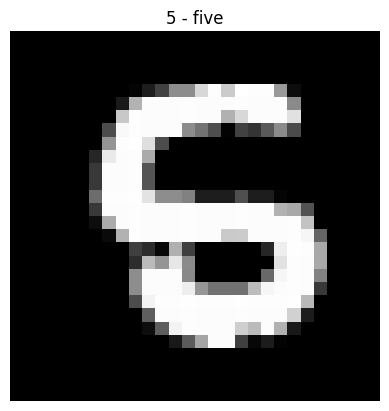

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Building a Convolutional Neural Network (CNN)

Alright, time to step things up a notch.

It's time to create a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN or ConvNet).

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as TinyVGG from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.

### What model should I use?

> **Question:** Wait, you say CNN's are good for images, are there any other model types I should be aware of?

Good question.

This table is a good general guide for which model to use (though there are exceptions).

| **Problem type** | **Model to use (generally)** | **Code example** |
| ----- | ----- | ----- |
| Structured data (Excel spreadsheets, row and column data) | Gradient boosted models, Random Forests, XGBoost | [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), [XGBoost library](https://xgboost.readthedocs.io/en/stable/) |
| Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [HuggingFace Transformers](https://huggingface.co/docs/transformers/index) |

> **Note:** The table above is only for reference, the model you end up using will be highly dependant on the problem you're working on and the constraints you have (amount of data, latency requirements).

Enough talking about models, let's now build a CNN that replicates the model on the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

![TinyVGG architecture, as setup by CNN explainer website](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

To do so, we'll leverage the [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) layers from `torch.nn`.


In [ ]:
# Creating an instance of the Flatten module from PyTorch's neural network library
flatten_model = nn.Flatten()

# Extracting the first batch of training features for demonstration purposes
x = train_features_batch[0]

# Applying the flatten operation to the input batch using the Flatten module
output = flatten_model(x)

# Displaying the shapes before and after flattening for illustration
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
class MNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    # First convolutional block
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,  # how big is the square that's going over the image?
                  stride=1,# default
                  padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2) # default stride value is same as kernel_size
    )

    # Second convolutional block
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    # Classifier block
    self.classifier = nn.Sequential(
        nn.Flatten(),
        # Where did this in_features shape come from?
        # It's because each layer of our network compresses and changes the shape of our inputs data.
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    # Forward pass through the model
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)

    return x

In [ ]:
# Setting a seed for reproducibility using the torch manual seed
torch.manual_seed(42)

# Creating an instance of the MNISTModelV0 with specified architecture and moving it to the device
model_0 = MNISTModelV0(input_shape=1,
                       hidden_units=10,
                       output_shape=len(class_names)).to(device)
# Displaying the architecture and details of the created model
model_0

MNISTModelV0(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 3.1 Setup a loss function and optimizer

Remember, if something still isn't clear, try starting small.

Pick a single layer of a model, pass some data through it and see what happens.

Now it's time to move forward and get to training!

Let's setup an accuracy function, loss function and an optimizer.

We'll use the functions as before, `nn.CrossEntropyLoss()` as the loss function (since we're working with multi-class classification data).

And `torch.optim.SGD()` as the optimizer to optimize `model_0.parameters()` with a learning rate of `0.1`.

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Training and testing

Loss and optimizer ready!

Time to train and test.

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
from timeit import default_timer as timer

# Function to print and return the training time
def printTrainTime(start: float,
                   end: float,
                   device: torch.device=None):
  # Calculate the total training time
  total_time = end - start

  # Print the training time with device information
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
torch.manual_seed(42)

train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----------")

  train_step(model=model_0,
             data_loader=train_data_loader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_0,
            data_loader=test_data_loader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()

total_train_time_model_0 = printTrainTime(start=train_time_start_on_gpu,
                                          end=train_time_end_on_gpu,
                                          device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----------
Train loss: 0.33409 | Train accuracy: 88.80%
Test loss: 0.07146 | Test accuracy: 97.80%

Epoch: 1
-----------
Train loss: 0.08180 | Train accuracy: 97.44%
Test loss: 0.06084 | Test accuracy: 98.11%

Epoch: 2
-----------
Train loss: 0.06433 | Train accuracy: 97.98%
Test loss: 0.05962 | Test accuracy: 98.09%

Train time on cuda: 37.496 seconds


### 4. Make predictions

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
  # List to store predicted probabilities for each input sample
  pred_probs = []

  # Move the model to the specified device
  model.to(device)

  # Set the model to evaluation mode
  model.eval()
  with torch.inference_mode():
    # Iterate over input data samples
    for sample in data:
       # Add a batch dimension and move the sample to the specified device
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass to obtain predicted logits from the model
      pred_logit = model(sample)

      # Apply softmax to obtain predicted probabilities
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Append the predicted probabilities to the list
      pred_probs.append(pred_prob.cpu())

  # Stack the predicted probabilities into a single tensor
  return torch.stack(pred_probs)

In [ ]:
import random

# Setting a seed for reproducibility using the random module
random.seed(42)

# Lists to store selected test samples and their corresponding labels
test_samples = []
test_labels = []

# Randomly selecting 9 samples from the test_data
# 'random.sample' returns a new list with 'k' unique elements randomly
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# Printing the shape of the first selected test sample
test_samples[0].shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

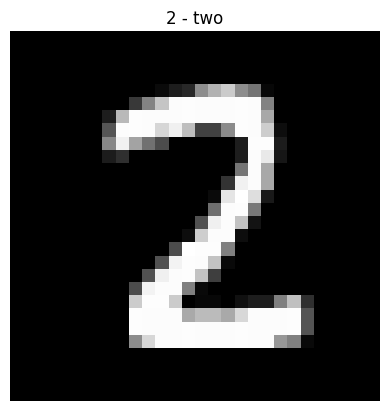

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [ ]:
# Making predictions using the model on the selected test samples
pred_probs = make_predictions(model=model_0,
                              data=test_samples)
pred_probs[:2]

tensor([[2.6831e-10, 6.7829e-07, 1.0000e+00, 3.3881e-07, 2.4159e-14, 9.8915e-15,
         7.9972e-14, 7.1826e-09, 3.6712e-06, 9.4622e-10],
        [2.3579e-07, 9.9663e-01, 1.1051e-05, 2.4057e-07, 7.8450e-06, 1.3550e-03,
         9.6254e-04, 3.0109e-07, 9.7400e-04, 5.7819e-05]])

In [ ]:
# Extracting the predicted classes from the predicted probabilities
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

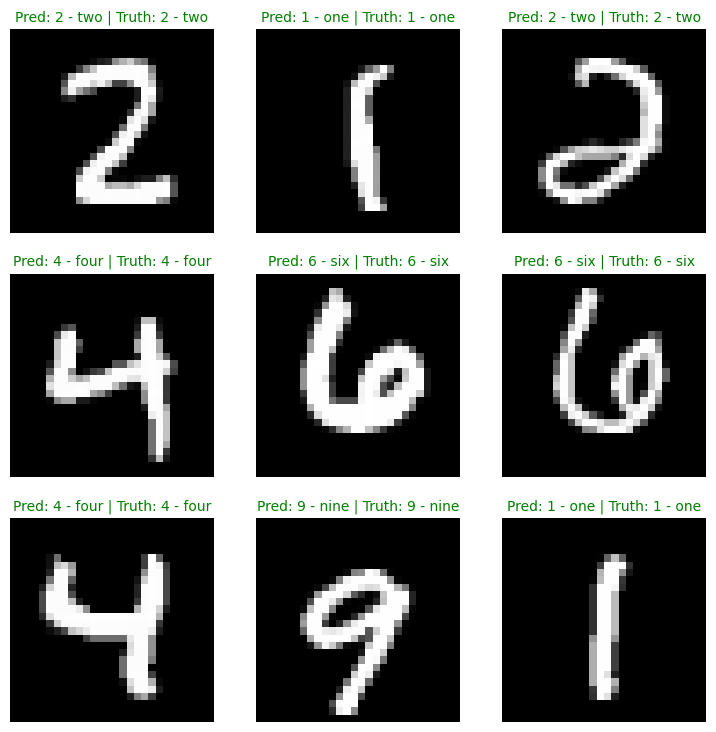

In [ ]:
# Creating a 3x3 grid for visualizing selected test samples, their predicted labels, and true labels
plt.figure(figsize=(9, 9))
rows, cols = 3, 3

# Iterating over the selected test samples
for i, sample in enumerate(test_samples):
  # Creating subplots in the grid
  plt.subplot(rows, cols, i + 1)

  # Displaying the current sample as an image in grayscale
  plt.imshow(sample.squeeze(), cmap="gray")

  # Retrieving the predicted and true labels for the current sample
  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  # Constructing the title text to display predicted and true labels
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Setting title color and font size based on correctness of prediction
  if pred_label == truth_label:
    plt.title(title_text, c="g", fontsize=10)
  else:
    plt.title(title_text, c="r", fontsize=10)
  # Turning off axis for a cleaner visualization
  plt.axis(False)